#Air Quality Index of Indian Cities Data analysis and Benford's Law
#Shivank Gupta krish.gupta@adypu.edu.in
#Atharv Paharia atharv.paharia@adypu.edu.in
#Kshitij Saxena kshitij.saxena@adypu.edu.in
#Vinayak Singh vinayak.singh01@adypu.edu.in

In [ ]:
#Air Quality Index of Indian Cities Data analysis and Benford's Law
#Shivank Gupta krish.gupta@adypu.edu.in
#Atharv Paharia atharv.paharia@adypu.edu.in
#Kshitij Saxena kshitij.saxena@adypu.edu.in
#Vinayak Singh vinayak.singh01@adypu.edu.in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

# Check current directory
print("Current working directory:", os.getcwd())
print("Files in this directory:", os.listdir())

# Load the dataset (use the correct path)
file_path = "./air_quality_index_of_indian_cities - air_quality_index_of_indian_cities.csv"
df = pd.read_csv(file_path)
df.head(100)

Current working directory: /Users/shivankgupta/Desktop/matproj
Files in this directory: ['air_quality_index_of_indian_cities - air_quality_index_of_indian_cities.csv', 'air_quality.ipynb']


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Gaya,"Kareemganj, Gaya - BSPCB",26-04-2025 18:00:00,24.792403,84.992416,NO2,1.0,8.0,5.0
1,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NO2,15.0,19.0,18.0
2,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,NH3,3.0,4.0,3.0
3,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,SO2,8.0,11.0,9.0
4,India,Bihar,Gaya,"SFTI Kusdihra, Gaya - BSPCB",26-04-2025 18:00:00,24.762518,84.982348,OZONE,3.0,81.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
95,India,Chhattisgarh,Tumidih,"OP Jindal Industrial Park, Tumidih - CECB",26-04-2025 18:00:00,22.066315,83.338201,OZONE,5.0,82.0,68.0
96,India,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",26-04-2025 18:00:00,28.647622,77.315809,PM2.5,8.0,468.0,260.0
97,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",26-04-2025 18:00:00,28.470691,77.109936,PM10,95.0,482.0,200.0
98,India,Delhi,Delhi,"Aya Nagar, Delhi - IMD",26-04-2025 18:00:00,28.470691,77.109936,CO,14.0,113.0,41.0


In [12]:
# Cell 1: Data Preprocessing and Cleaning
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Get dataset info and statistics
print("\nDataset Information:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nDataset Column Types:")
print(df.dtypes)

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

Missing values in each column:
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    185
pollutant_max    185
pollutant_avg    185
aqi_category       0
dtype: int64

Dataset Information:
Number of records: 3168
Number of features: 12

Dataset Column Types:
country           object
state             object
city              object
station           object
last_update       object
latitude         float64
longitude        float64
pollutant_id      object
pollutant_min    float64
pollutant_max    float64
pollutant_avg    float64
aqi_category      object
dtype: object

Basic Statistics:
          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3168.000000  3168.000000    2983.000000    2983.000000    2983.000000
mean     22.238892    78.837241      22.475696      84.085820      48.607107
std       5.542343     4.947403      24.324640  

In [4]:
# Cell 3: Understanding the data structure
# Check column names
print("Column names:")
print(df.columns.tolist())

# Check unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts().head(10))  # Show top 10 values
    
# Check temporal range (if date column exists)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")

# Show summary of dataframe
df.info()

Column names:
['country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg']

Unique values in country:
country
India    3168
Name: count, dtype: int64

Unique values in state:
state
Maharashtra       532
Uttar_Pradesh     359
Rajasthan         321
Delhi             255
Bihar             227
TamilNadu         212
Karnataka         191
Madhya Pradesh    171
West_Bengal       147
Odisha            119
Name: count, dtype: int64

Unique values in city:
city
Delhi        255
Mumbai       151
Hyderabad     96
Bengaluru     84
Ahmedabad     55
Pune          55
Kolkata       49
Chennai       48
Jaipur        42
Moradabad     42
Name: count, dtype: int64

Unique values in station:
station
Kareemganj, Gaya - BSPCB                             7
Bollaram Industrial Area, Hyderabad - TSPCB          7
Municipal Corporation Office, Tirunelveli - TNPCB    7
New Malakpet, Hyderabad - TSPCB                      7
Nachara

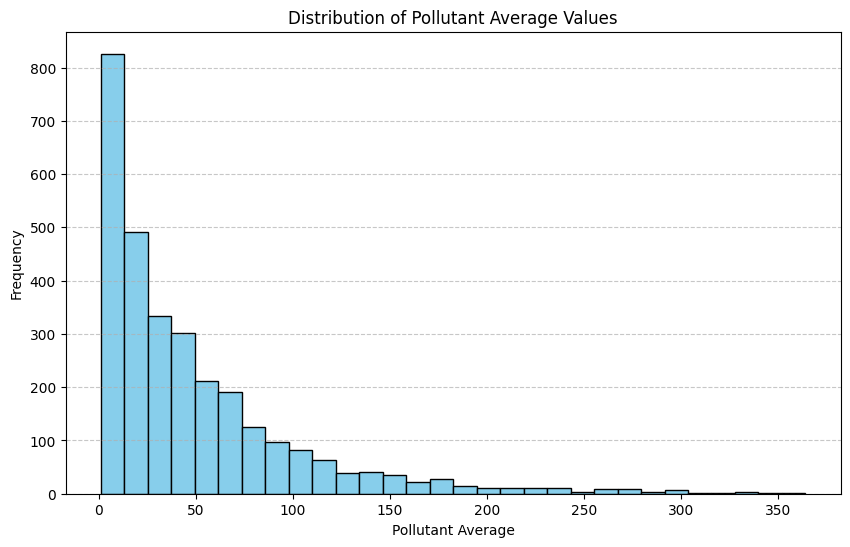

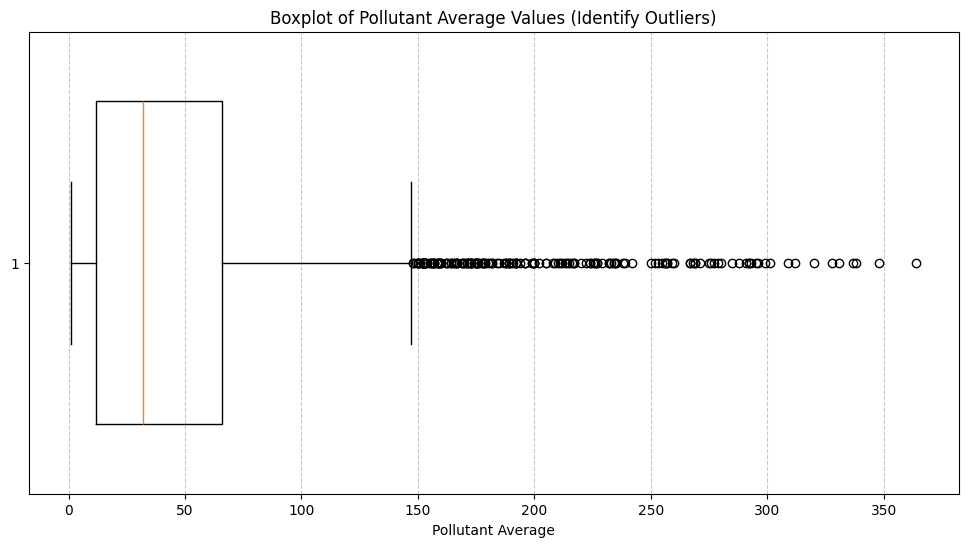

In [5]:
# Cell 4: Pollutant Distribution Analysis
plt.figure(figsize=(10, 6))
plt.hist(df['pollutant_avg'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Pollutant Average Values')
plt.xlabel('Pollutant Average')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create boxplot to identify outliers
plt.figure(figsize=(12, 6))
plt.boxplot(df['pollutant_avg'].dropna(), vert=False, widths=0.7)
plt.title('Boxplot of Pollutant Average Values (Identify Outliers)')
plt.xlabel('Pollutant Average')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

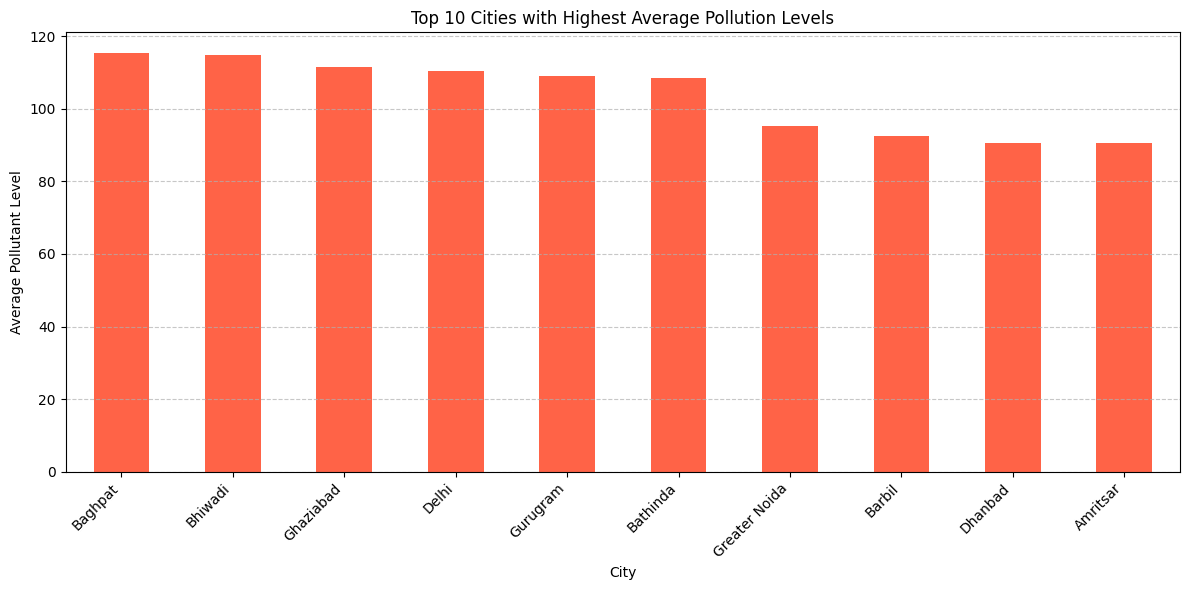

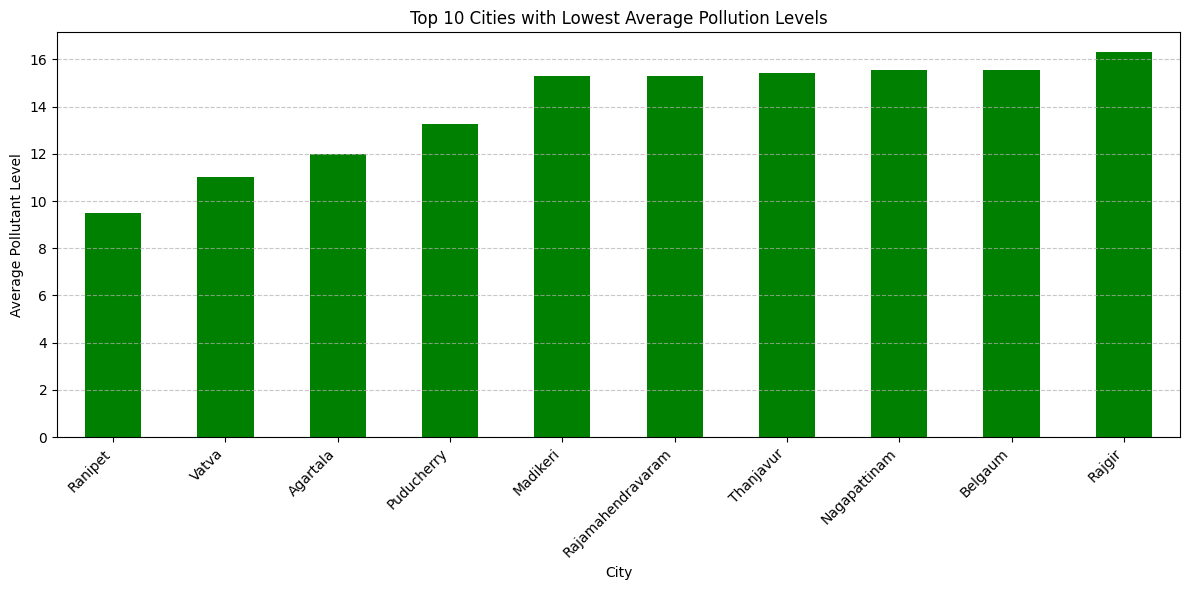

In [6]:
# Cell 5: City-wise Analysis
# Check if 'city' column exists
if 'city' in df.columns:
    # Get top 10 cities by average pollution level
    top_cities = df.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    top_cities.plot(kind='bar', color='tomato')
    plt.title('Top 10 Cities with Highest Average Pollution Levels')
    plt.xlabel('City')
    plt.ylabel('Average Pollutant Level')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Bottom 10 cities (cleanest air)
    bottom_cities = df.groupby('city')['pollutant_avg'].mean().sort_values().head(10)
    
    plt.figure(figsize=(12, 6))
    bottom_cities.plot(kind='bar', color='green')
    plt.title('Top 10 Cities with Lowest Average Pollution Levels')
    plt.xlabel('City')
    plt.ylabel('Average Pollutant Level')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No 'city' column found in the dataset")

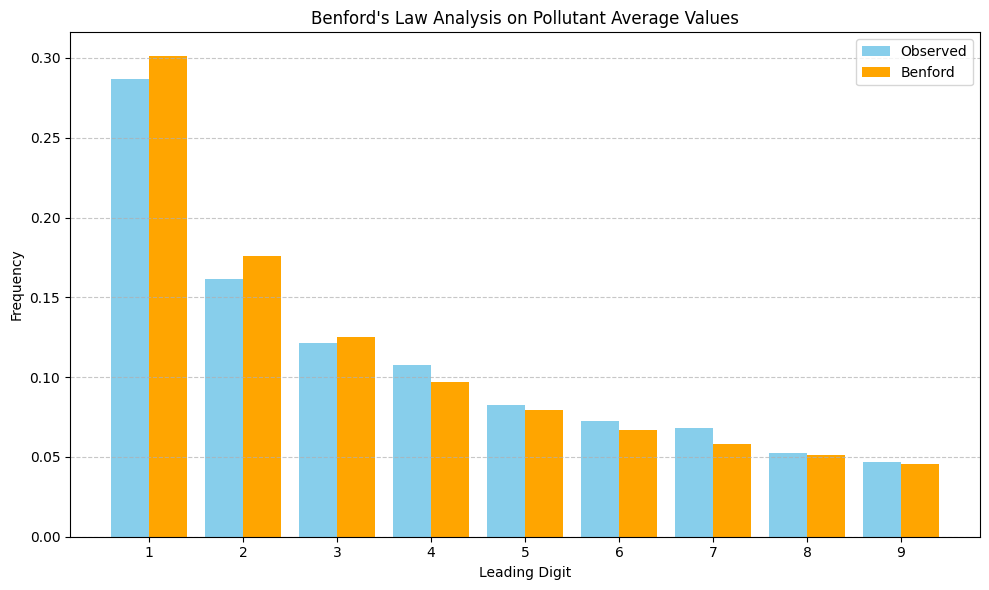

In [8]:
# Cell 6: Benford's Law Analysis
# Extract the first digit of each non-null, positive pollutant_avg value
first_digits = df['pollutant_avg'].dropna()
first_digits = first_digits[first_digits > 0].astype(str).str[0].astype(int)
# Calculate observed frequency
observed_counts = first_digits.value_counts().sort_index()
observed_freq = observed_counts / observed_counts.sum()
# Expected Benford's Law distribution for digits 1–9
digits = np.arange(1, 10)
benford_freq = np.log10(1 + 1 / digits)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(digits - 0.2, observed_freq, width=0.4, label='Observed', color='skyblue')
plt.bar(digits + 0.2, benford_freq, width=0.4, label='Benford', color='orange')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title("Benford's Law Analysis on Pollutant Average Values")
plt.xticks(digits)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

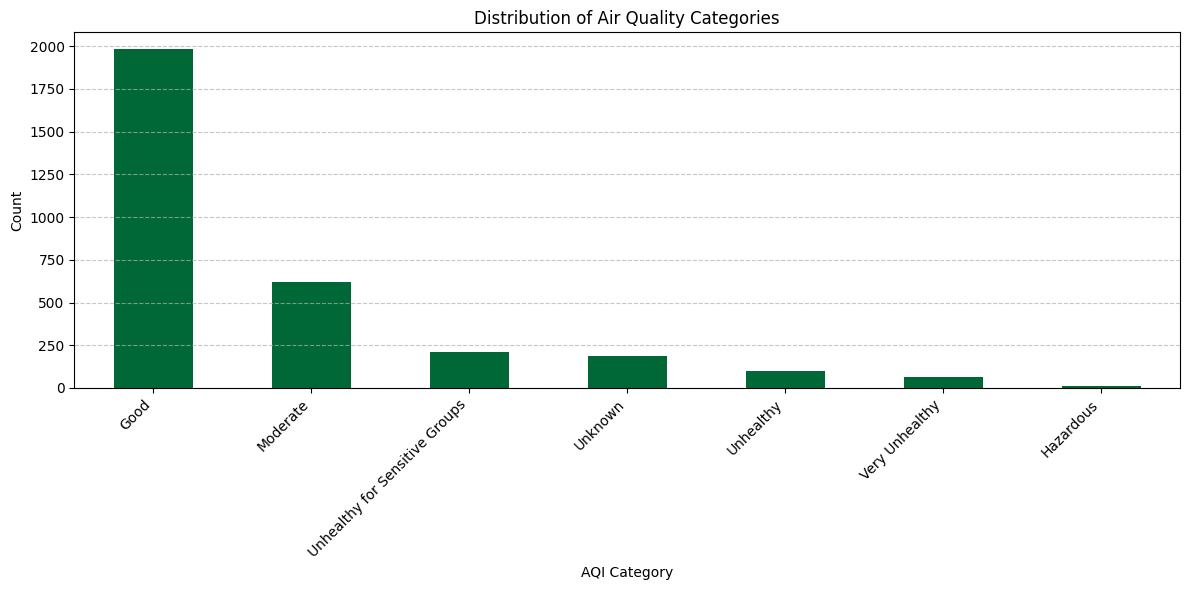

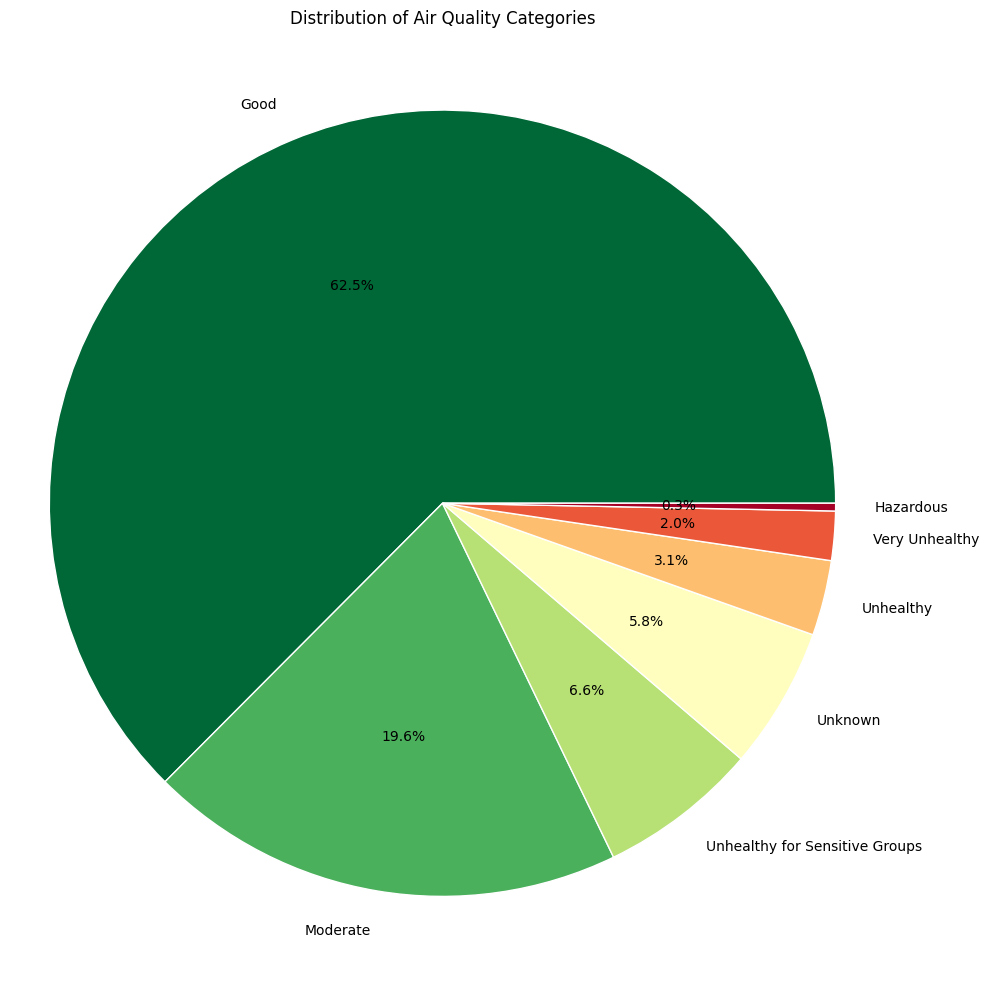

In [9]:
# Cell 7: Pollution Category Analysis
# Create pollution categories based on AQI standards
def categorize_aqi(value):
    if pd.isna(value):
        return "Unknown"
    elif value <= 50:
        return "Good"
    elif value <= 100:
        return "Moderate"
    elif value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif value <= 200:
        return "Unhealthy"
    elif value <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Apply the function to create a new column
df['aqi_category'] = df['pollutant_avg'].apply(categorize_aqi)

# Plot distribution of categories
plt.figure(figsize=(12, 6))
category_counts = df['aqi_category'].value_counts()
category_counts.plot(kind='bar', colormap='RdYlGn_r')
plt.title('Distribution of Air Quality Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Also show as a pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.RdYlGn_r(np.linspace(0, 1, len(category_counts))),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Distribution of Air Quality Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()


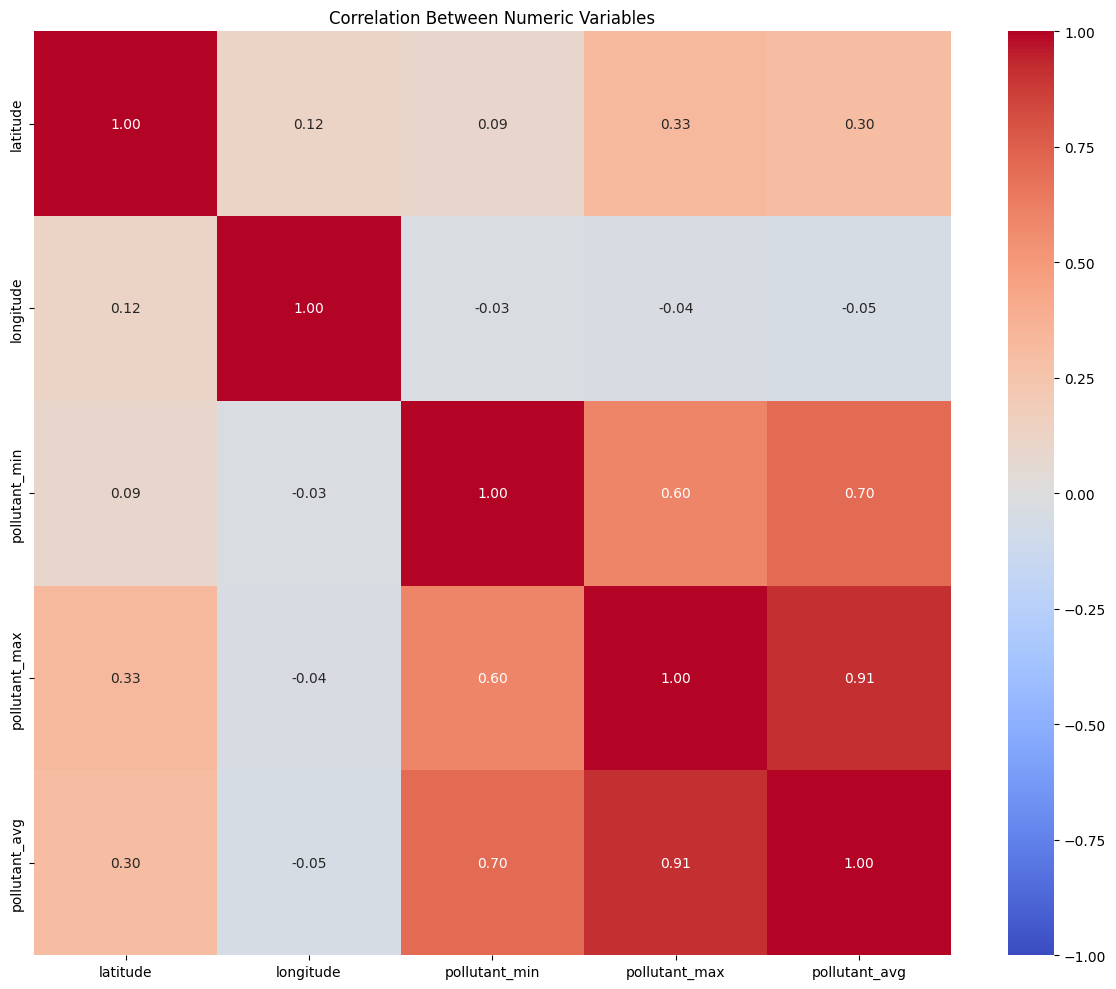

In [17]:
# Cell 8: Correlation Analysis
# Import seaborn if not already imported
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Make sure we have enough numeric columns
if numeric_df.shape[1] > 1:
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Between Numeric Variables')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis")

In [22]:
# Cell 9: Statistical Analysis of Pollutant Data
!pip install scipy
# Z-score to identify outliers
if 'pollutant_avg' in df.columns:
    from scipy import stats
    
    # Create a copy of the DataFrame without null values in pollutant_avg
    df_no_na = df.dropna(subset=['pollutant_avg'])
    
    # Calculate Z-scores on the clean data
    z_scores = stats.zscore(df_no_na['pollutant_avg'])
    
    # Identify outliers (abs(z-score) > 3)
    outliers = df_no_na[abs(z_scores) > 3]
    
    print(f"Number of outliers identified: {len(outliers)}")
    print("\nTop 10 outliers:")
    
    if 'city' in df.columns:
        print(outliers[['city', 'pollutant_avg']].head(10))
    else:
        print(outliers['pollutant_avg'].head(10))
        
    # Descriptive statistics by groups
    if 'aqi_category' in df.columns:
        print("\nStatistics by AQI Category:")
        print(df.groupby('aqi_category')['pollutant_avg'].describe())

Number of outliers identified: 71

Top 10 outliers:
       city  pollutant_avg
86    Delhi          233.0
96    Delhi          260.0
100   Delhi          226.0
101   Delhi          257.0
134   Delhi          217.0
139   Delhi          224.0
156   Delhi          277.0
165   Delhi          291.0
166   Delhi          320.0
342  Barbil          235.0

Statistics by AQI Category:
                                 count        mean        std    min    25%  \
aqi_category                                                                  
Good                            1981.0   20.011106  14.263391    1.0    8.0   
Hazardous                         10.0  328.800000  19.118345  301.0  314.0   
Moderate                         622.0   71.472669  13.914568   51.0   60.0   
Unhealthy                         98.0  171.224490  14.805635  151.0  158.0   
Unhealthy for Sensitive Groups   208.0  120.610577  14.510276  101.0  109.0   
Unknown                            0.0         NaN        NaN    NaN 

In [7]:
# Extract the first digit of each non-null, positive pollutant_avg value
first_digits = df['pollutant_avg'].dropna()
first_digits = first_digits[first_digits > 0].astype(str).str[0].astype(int)
# Calculate observed frequency
observed_counts = first_digits.value_counts().sort_index()
observed_freq = observed_counts / observed_counts.sum()
# Expected Benford's Law distribution for digits 1–9
digits = np.arange(1, 10)
benford_freq = np.log10(1 + 1 / digits)

In [ ]:
# Shivank Gupta

# Created the complete Jupyter Notebook (IPYNB) file.

# Performed data analysis and integrated the logic of Benford’s Law.


# Kshitij Saxena

# Designed and created the PowerPoint (PPT) presentation for the project.

# Summarized the findings and helped visualize key insights from the analysis.


# Atharv Paharia

# Acted as the Team Leader, coordinating tasks and timelines.

# Provided support to both Shivank (Notebook) and Kshitij (PPT) in refining and finalizing their work.


# Vinayak Singh

# Helped in debugging and refining the Jupyter Notebook.

# Assisted with code corrections and ensuring smooth execution of the notebook.